In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.datasets import mnist  # You can also use fashion_mnist

# Optional: Set seaborn theme for nicer visuals
sns.set_theme(style="whitegrid")


In [ ]:
# Load the dataset (replace with Fashion MNIST if preferred)
(train_features, train_labels), (test_features, test_labels) = mnist.load_data()

# Display dataset structure
print(f"Train features shape: {train_features.shape}")
print(f"Test features shape: {test_features.shape}")

Train features shape: (60000, 28, 28)
Test features shape: (10000, 28, 28)


In [9]:
# Display the first five rows of the training dataset
print("First five rows of train features:\n", train_features[:5])
print("First five labels of train data:\n", train_labels[:5])


First five rows of train features:
 [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
First five labels of train data:
 [5 0 4 1 9]


In [10]:
# Number of samples and features
print("Training dataset shape:", train_features.shape)
print("Testing dataset shape:", test_features.shape)
print("Number of samples in training data:", train_features.shape[0])
print("Image dimensions:", train_features.shape[1:])


Training dataset shape: (60000, 28, 28)
Testing dataset shape: (10000, 28, 28)
Number of samples in training data: 60000
Image dimensions: (28, 28)


In [11]:
# Unique values in the labels
print("Unique labels in training data:", np.unique(train_labels))
print("Unique labels in test data:", np.unique(test_labels))


Unique labels in training data: [0 1 2 3 4 5 6 7 8 9]
Unique labels in test data: [0 1 2 3 4 5 6 7 8 9]


In [12]:
X_train, y_train = train_features, train_labels
X_test, y_test = test_features, test_labels


In [13]:
# Normalize the dataset
X_train = X_train / 255.0
X_test = X_test / 255.0


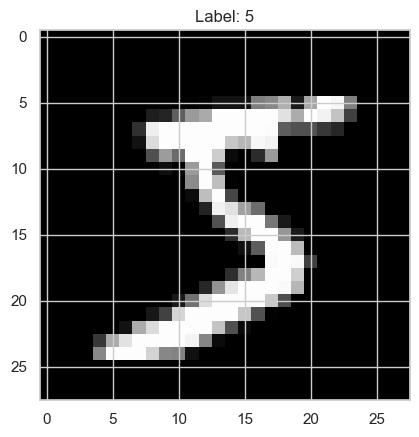

In [14]:
# Reshape to display a sample image
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()


In [15]:
def memory_usage(data):
    return data.nbytes / (1024 * 1024)  # Convert bytes to MB

memory_before = memory_usage(train_features)
memory_after = memory_usage(X_train)

print(f"Memory before normalization: {memory_before:.2f} MB")
print(f"Memory after normalization: {memory_after:.2f} MB")
print(f"Memory saved: {memory_before - memory_after:.2f} MB")


Memory before normalization: 44.86 MB
Memory after normalization: 358.89 MB
Memory saved: -314.03 MB


Label counts in training data:
 0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: count, dtype: int64


/var/folders/j0/w_sc6_7n777fy7v8ytm1r08w0000gn/T/ipykernel_2777/1701927514.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


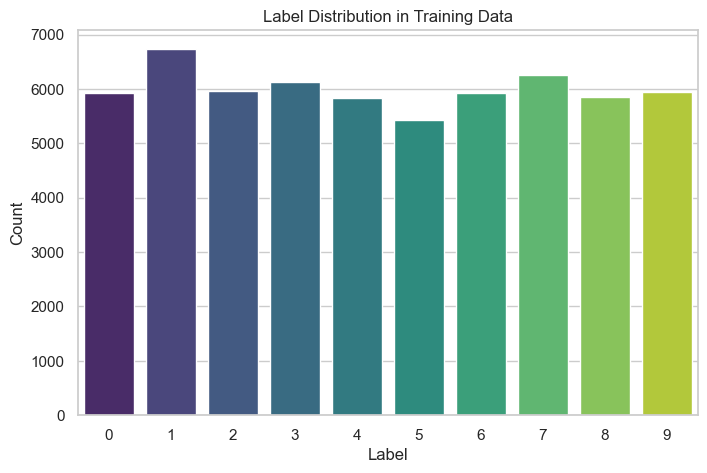

In [16]:
# Count label instances
label_counts = pd.Series(y_train).value_counts().sort_index()
print("Label counts in training data:\n", label_counts)

# Plot the label distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.title("Label Distribution in Training Data")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()
